In [1]:
%matplotlib inline
%reload_ext autoreload
%autoreload 2
%qtconsole

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='ticks', context='poster', font_scale=0.9,
            rc={'xtick.major.size': 3,
                'ytick.major.size': 3,
                'xtick.major.width': 1,
                'ytick.major.width': 1,
                'xtick.major.pad': 3.5,
                'ytick.major.pad': 3.5,
                'axes.linewidth': 1,
                'lines.linewidth': 2,
               })

ripple_info = pd.read_hdf('../scripts/results.h5', key='/ripple_info').dropna()

In [8]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 $('div.output_stderr').hide();
 } else {
 $('div.input').show();
 $('div.output_stderr').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action='javascript:code_toggle()'><input STYLE='color: #4286f4' type='submit' value='Click here to toggle on/off the raw code.'></form>''')

# Sharp Wave Ripple Replay Analysis
Date: 2017-03-21

## Dataset
![](http://www.cell.com/cms/attachment/2080561999/2072098661/gr1.jpg)

## Ripple Detection

### Example Ripple

### Spectrogram of all Ripples

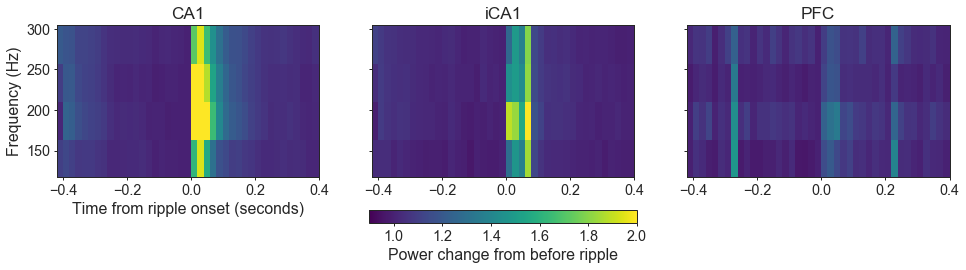

In [207]:
from src.spectral import plot_spectrogram

key = '/all_animals/ripple_frequencies_50Hz_Res/power/all_ripples/ripple_difference_from_baseline'
ripple_power = pd.read_hdf('../scripts/results.h5',
                           key=key)

fig, axes = plt.subplots(1, 3, figsize=(16, 4), sharex=True, sharey=True)

mesh = plot_spectrogram(ripple_power['CA1'],
                         spectrum_name='power_spectrum',
                         axis_handle=axes[0], vmin=0.9, vmax=2)
axes[0].set_title('CA1')
axes[0].set_ylabel('Frequency (Hz)')
axes[0].set_xlabel('Time from ripple onset (seconds)')

plot_spectrogram(ripple_power['iCA1'],
                 spectrum_name='power_spectrum',
                 axis_handle=axes[1], vmin=0.9, vmax=2)
axes[1].set_title('iCA1')

plot_spectrogram(ripple_power['PFC'],
                 spectrum_name='power_spectrum',
                 axis_handle=axes[2], vmin=0.9, vmax=2)
axes[2].set_title('PFC')

plt.colorbar(mesh, ax=axes.ravel().tolist(),
             label='Power change from before ripple',
             orientation='horizontal',
             shrink=0.3);

### Number of Ripples

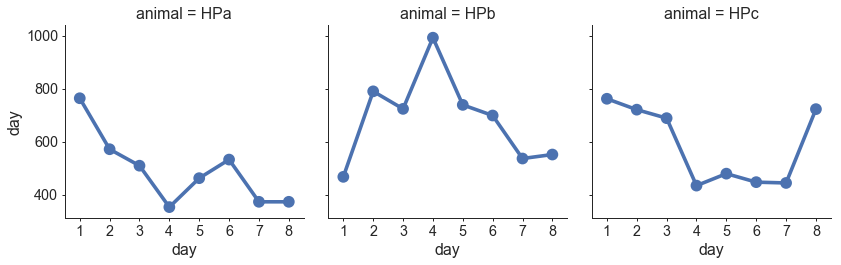

In [7]:
sns.factorplot(data=ripple_info.reset_index(), x='day', y='day', estimator=len, col='animal')

### Ripple Duration

/Users/edeno/anaconda3/envs/Jadhav-2016-Data-Analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


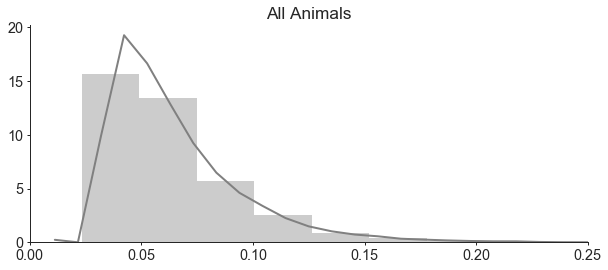

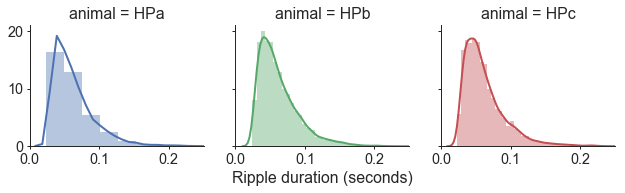

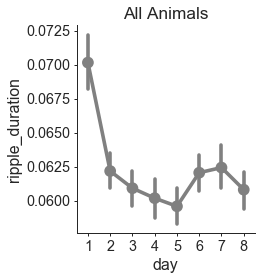

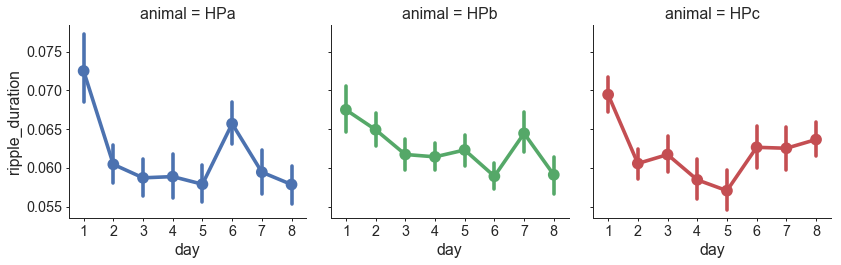

In [208]:
ripple_duration = ripple_info.ripple_end_time - ripple_info.ripple_start_time
ripple_duration.name = 'ripple_duration'


f, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.distplot(ripple_duration, ax=ax, color='grey')
ax.set_xlim((0, 0.250))
plt.title('All Animals')
plt.xlabel('')
sns.despine()

g = sns.FacetGrid(ripple_duration.reset_index(), col='animal', hue='animal',
                  sharex=True, sharey=True, xlim=(0,.250))
g.map(sns.distplot, 'ripple_duration');
g.axes[0, 1].set_xlabel('Ripple duration (seconds)')
g.axes[0, 0].set_xlabel('')
g.axes[0, 2].set_xlabel('');

g = sns.factorplot(data=ripple_duration.reset_index(), x='day', y='ripple_duration', color='grey');
# g.map(plt.axvspan, xmin=0, xmax=4, alpha=0.1, facecolor='grey')
plt.title('All Animals')
g = sns.factorplot(data=ripple_duration.reset_index(),
                   x='day', y='ripple_duration', col='animal',
                   hue='animal');
# g.map(plt.axvspan, xmin=0, xmax=4, alpha=0.1, facecolor='grey')

### Ripple Location

## Ripple Decoding

![](http://jn.physiology.org/content/jn/116/5/2221/F4.large.jpg)

### Probability of Ripple State
#### By Animal

/Users/edeno/anaconda3/envs/Jadhav-2016-Data-Analysis/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


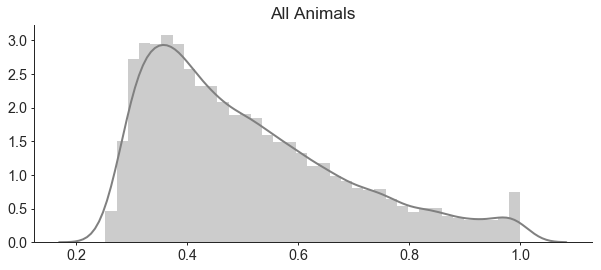

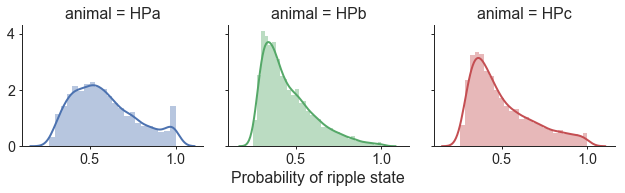

In [209]:
f, ax = plt.subplots(1, 1, figsize=(10, 4))
sns.distplot(ripple_info.ripple_state_probability.dropna(), ax=ax, color='grey')
plt.xlabel('')
plt.title('All Animals')
sns.despine()

g = sns.FacetGrid(ripple_info.reset_index().dropna(), col='animal', hue='animal')
g.map(sns.distplot, 'ripple_state_probability');
g.set(xlabel='')
g.axes[0,1].set_xlabel('Probability of ripple state');

#### Over Days

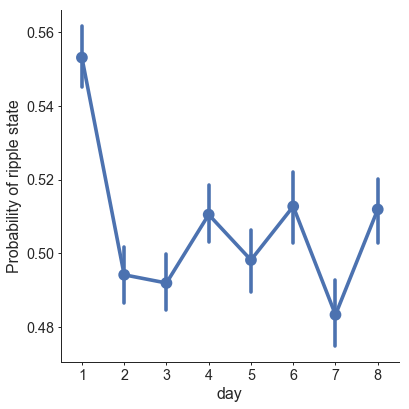

In [210]:
sns.factorplot(data=ripple_info.reset_index().dropna(),
               y='ripple_state_probability', x='day', size=6);
plt.ylabel('Probability of ripple state');

#### Over Days By Animal

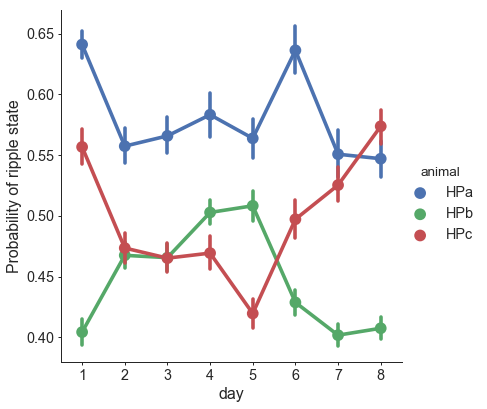

In [211]:
sns.factorplot(data=ripple_info.reset_index().dropna(), hue='animal',
               y='ripple_state_probability', x='day', size=6);
plt.ylabel('Probability of ripple state');

## Ripple Catogories

### Inbound vs. Outbound

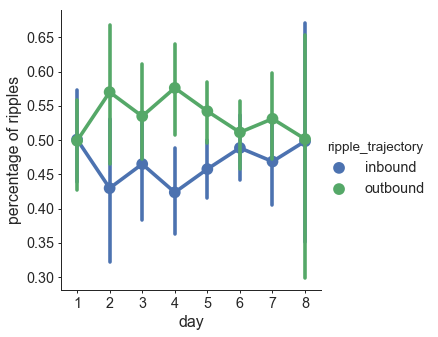

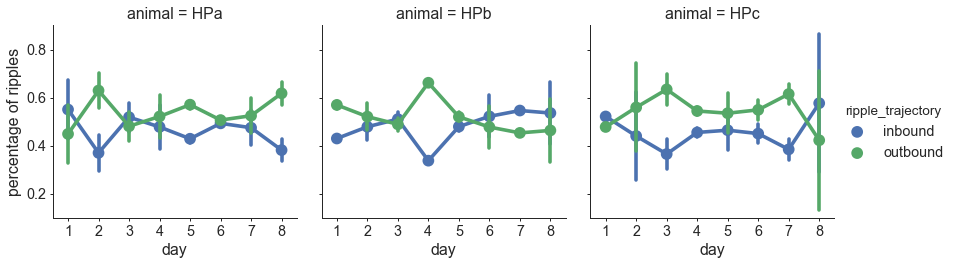

In [212]:
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])['ripple_trajectory'].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_trajectory', size=5);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_trajectory', col='animal');

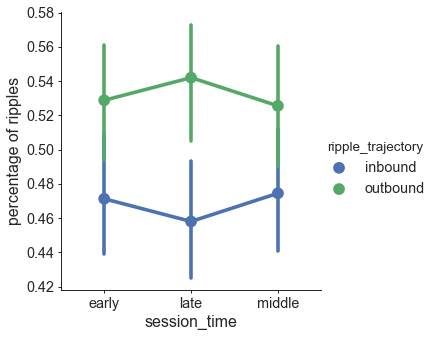

In [213]:
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'session_time'])['ripple_trajectory'].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples,
               x='session_time', y='percentage of ripples',
               hue='ripple_trajectory', size=5);

### Forward vs. Reverse

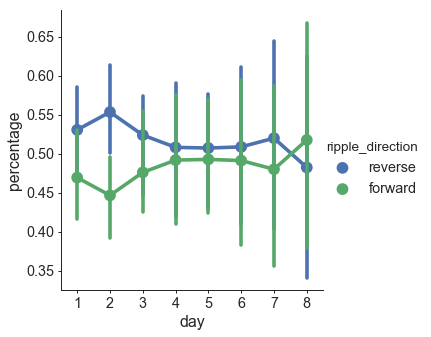

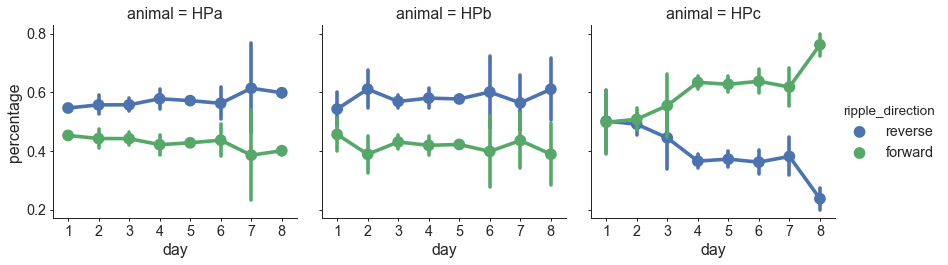

In [214]:
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch'])['ripple_direction'].value_counts(normalize=True)
 .rename('percentage').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage', hue='ripple_direction', size=5);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage', hue='ripple_direction', col='animal');

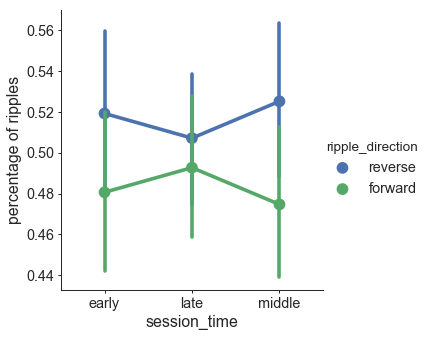

In [215]:
percentage_of_ripples = (ripple_info.reset_index()
 .groupby(['animal', 'day', 'epoch', 'session_time'])['ripple_direction'].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples,
               x='session_time', y='percentage of ripples',
               hue='ripple_direction', size=5);

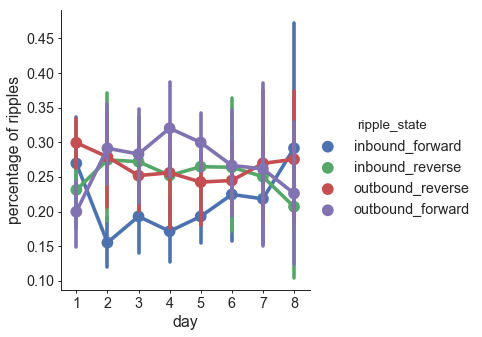

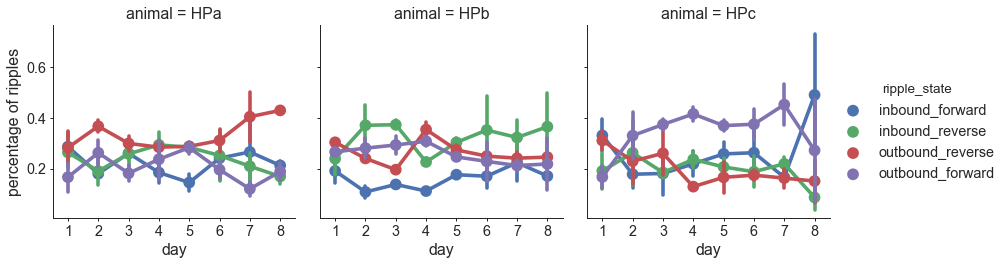

In [232]:
percentage_of_ripples = (ripple_info
                         .assign(ripple_state=lambda x: x['ripple_trajectory'] + '_' + x['ripple_direction'])
                         .reset_index()
                         .groupby(['animal', 'day', 'epoch'])['ripple_state']
                         .value_counts(normalize=True)
                         .rename('percentage of ripples')
                         .reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_state', size=5);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_state', col='animal');

### Thresholded By Probability

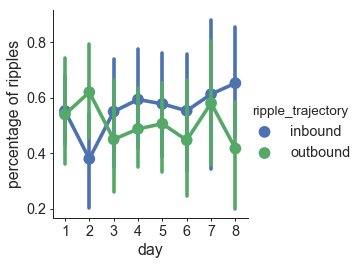

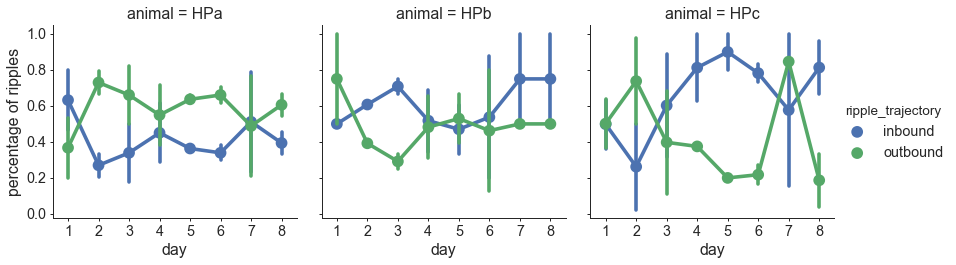

In [216]:
percentage_of_ripples = (ripple_info.query('ripple_state_probability >= 0.8').reset_index()
 .groupby(['animal', 'day', 'epoch'])['ripple_trajectory'].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples,
               x='day', y='percentage of ripples',
               hue='ripple_trajectory');
sns.factorplot(data=percentage_of_ripples,
               x='day', y='percentage of ripples',
               hue='ripple_trajectory', col='animal');

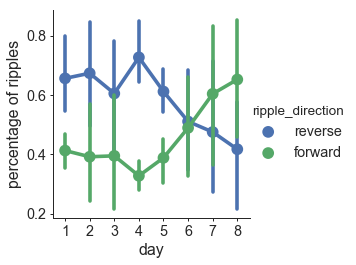

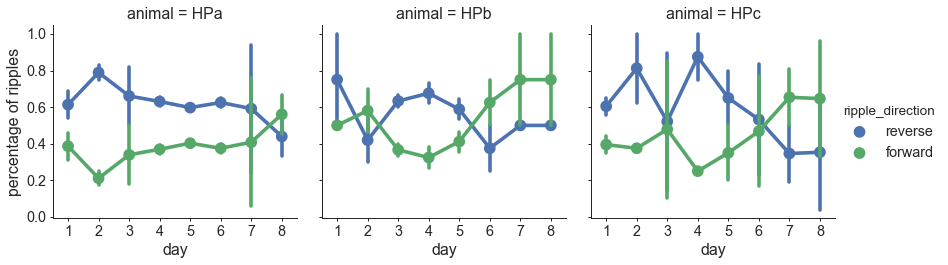

In [217]:
percentage_of_ripples = (ripple_info.query('ripple_state_probability >= 0.8').reset_index()
 .groupby(['animal', 'day', 'epoch'])['ripple_direction'].value_counts(normalize=True)
 .rename('percentage of ripples').reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_direction');
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_direction', col='animal');

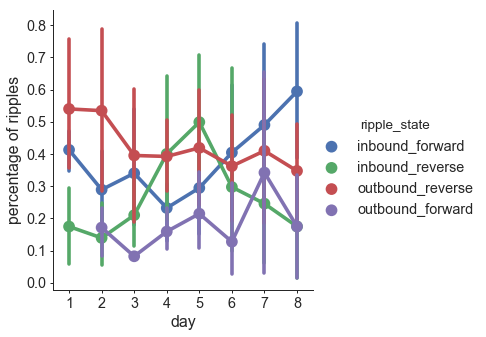

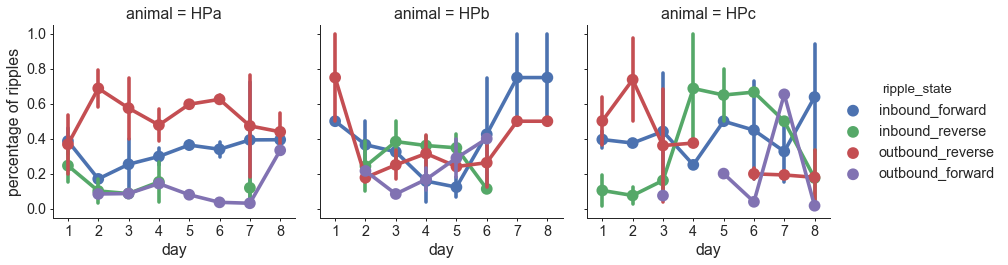

In [237]:
percentage_of_ripples = (ripple_info
                         .query('ripple_state_probability >= 0.8')
                         .assign(ripple_state=lambda x: x['ripple_trajectory'] + '_' + x['ripple_direction'])
                         .reset_index()
                         .groupby(['animal', 'day', 'epoch'])['ripple_state']
                         .value_counts(normalize=True)
                         .rename('percentage of ripples')
                         .reset_index())

sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_state', size=5);
sns.factorplot(data=percentage_of_ripples, x='day', y='percentage of ripples', hue='ripple_state', col='animal');